# Rating Prediction Model based on the Item-User Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import io
import numpy as np
import pandas as pd
import sklearn.metrics 


### Data loading and Processing

In [2]:
import gzip
import json
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')
df=getDF("Luxury_Beauty_5.json.gz")


In [3]:
df=df.drop(["vote","image","unixReviewTime"], axis=1)
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!
...,...,...,...,...,...,...,...,...,...
34273,4.0,False,"09 3, 2017",A2CF66KIQ3RKX3,B01GOZ61O8,NaN,Vivian Deliz,I like to use moisturizers and sunscreens that...,Works great as a moisturizer and sunscreen
34274,4.0,False,"09 3, 2017",A1LKOIZXPQ9VG0,B01GOZ61O8,NaN,Elisa 20,I wouldn't be able to afford this if not asked...,Nice skin care product and sunscreen if you do...
34275,1.0,True,"08 25, 2017",AV2RWORXTFRJU,B01H353HUY,NaN,Gapeachmama,Did nothing,One Star
34276,5.0,False,"07 8, 2017",A22S7D0LP8GRDH,B01H353HUY,NaN,Jacob and Kiki Hantla,I love the Oribe bright blonde radiance spray....,No more brass!


### Establishing Recommend System

In [4]:
from surprise import Dataset,Reader,SVD
from surprise.model_selection import cross_validate,GridSearchCV
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

### Find the Best Model

In [5]:
#from surprise import print_perf
### use NormalPredictor
from surprise import NormalPredictor
algo = NormalPredictor()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
print(perf)

### use BaselineOnly
from surprise import BaselineOnly
algo = BaselineOnly()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
print(perf)

### use Basic collaborative filtering
from surprise import KNNBasic
algo = KNNBasic()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
print(perf)

### use Mean cooperative filtering
from surprise import KNNWithMeans
algo = KNNWithMeans()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
print(perf)

### Use Collaborative Filtering baseline
from surprise import KNNBaseline
algo = KNNBaseline()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
print(perf)

### use SVD
from surprise import SVD
algo = SVD()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
print(perf)

### use SVD++
from surprise import SVDpp
algo = SVDpp()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
print(perf)

### use NMF
from surprise import NMF
algo = NMF()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
print(perf)

{'test_rmse': array([1.34254125, 1.32075428, 1.33041921]), 'test_mae': array([1.01018172, 0.98652898, 0.9967074 ]), 'fit_time': (0.03429675102233887, 0.04078841209411621, 0.042577505111694336), 'test_time': (0.07072138786315918, 0.0685110092163086, 0.13612937927246094)}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
{'test_rmse': array([0.92370444, 0.93397823, 0.91599164]), 'test_mae': array([0.69952286, 0.70651137, 0.69662745]), 'fit_time': (0.06468367576599121, 0.057279348373413086, 0.05780673027038574), 'test_time': (0.0982213020324707, 0.06801199913024902, 0.13756108283996582)}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'test_rmse': array([0.94911132, 0.91856735, 0.92424328]), 'test_mae': array([0.59953451, 0.58622182, 0.58760376]), 'fit_time': (0.333095550537109

### Use the Best Model (SVDpp) to Test the Best Parameters

In [18]:
# Define the parameter grid to be preferred
param_grid = {'n_epochs': [100,200,500], 'lr_all': [0.005,0.01,0.02],
              'reg_all': [0.2, 0.4, 0.6]}

# Cross validation using grid search
grid_search = GridSearchCV(SVDpp, param_grid, measures=['RMSE'，"FCP"],n_jobs=-1)
# Find the best parameters on the data set
grid_search.fit(data)

# Output the best RMSE results
print(grid_search.best_score)


# Output the parameters corresponding to the best RMSE result
best_params = grid_search.best_params['rmse']
print(grid_search.best_params)

{'rmse': 0.7935574033597284}
{'rmse': {'n_epochs': 500, 'lr_all': 0.01, 'reg_all': 0.2}}


### Train the Rating Prediction Model

In [23]:
from surprise.model_selection import train_test_split
trainset,testset=train_test_split(data, test_size=0.2, train_size=None, random_state=None, shuffle=True)
algo = grid_search.best_estimator["rmse"]
training_process=algo.fit(trainset)
predictions = algo.test(testset)

# Compute the percentage of correct predictions
correct_predictions = [1 for p in predictions if abs(p.est - p.r_ui) <= 0.5]
percentage_correct = sum(correct_predictions) / len(predictions)
print('Percentage of correct predictions:', percentage_correct)

Percentage of correct predictions: 0.6153733955659276


### Visualize the Dynamic RMSE During the Training

RMSE: 0.9281
RMSE: 0.8887
RMSE: 0.8683
RMSE: 0.8556
RMSE: 0.8493
RMSE: 0.8449
RMSE: 0.8420
RMSE: 0.8395
RMSE: 0.8381
RMSE: 0.8368
RMSE: 0.8355
RMSE: 0.8346
RMSE: 0.8342
RMSE: 0.8330
RMSE: 0.8326
RMSE: 0.8318
RMSE: 0.8310
RMSE: 0.8301
RMSE: 0.8302
RMSE: 0.8287
RMSE: 0.8283
RMSE: 0.8277
RMSE: 0.8268
RMSE: 0.8267
RMSE: 0.8268
RMSE: 0.8268
RMSE: 0.8261
RMSE: 0.8261
RMSE: 0.8252
RMSE: 0.8240
RMSE: 0.8246
RMSE: 0.8237
RMSE: 0.8242
RMSE: 0.8227
RMSE: 0.8235
RMSE: 0.8237
RMSE: 0.8223
RMSE: 0.8236
RMSE: 0.8237
RMSE: 0.8234
RMSE: 0.8223
RMSE: 0.8227
RMSE: 0.8222
RMSE: 0.8229
RMSE: 0.8233
RMSE: 0.8218
RMSE: 0.8222
RMSE: 0.8219
RMSE: 0.8216
RMSE: 0.8216
RMSE: 0.8223
RMSE: 0.8208
RMSE: 0.8218
RMSE: 0.8203
RMSE: 0.8210
RMSE: 0.8202
RMSE: 0.8213
RMSE: 0.8213
RMSE: 0.8216
RMSE: 0.8207
RMSE: 0.8203
RMSE: 0.8204
RMSE: 0.8204
RMSE: 0.8191
RMSE: 0.8200
RMSE: 0.8194
RMSE: 0.8202
RMSE: 0.8217
RMSE: 0.8195
RMSE: 0.8205
RMSE: 0.8191
RMSE: 0.8209
RMSE: 0.8188
RMSE: 0.8198
RMSE: 0.8195
RMSE: 0.8193
RMSE: 0.8196

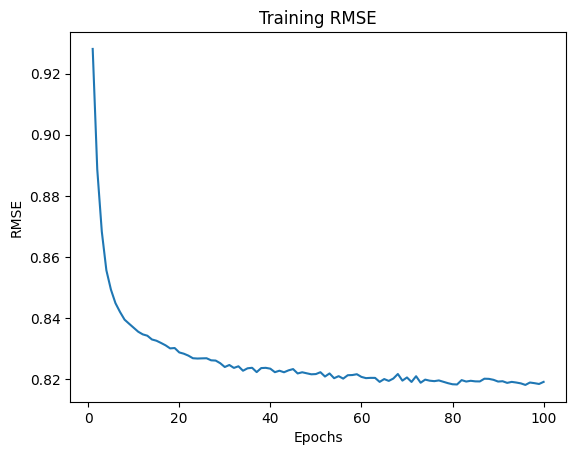

In [32]:
from surprise import accuracy
import matplotlib.pyplot as plt

test_mse=[]
for i in np.arange(100):
    algo = SVDpp(n_epochs=i+1, lr_all=0.05, reg_all=0.4)
    training_process = algo.fit(trainset)
    test_pred = algo.test(testset)
    test_mse.append(accuracy.rmse(test_pred))


#plt.plot(np.arange(1,51),train_mse)
plt.plot(np.arange(1,101),test_mse)
plt.title('Training RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

## Deep matrix factorization (DMF)  
### Data loading and preprocessing

In [12]:
data = df[['reviewerID', 'asin', 'overall']]
data["overall"]=data["overall"].fillna('0').astype('int32' , errors='ignore' )
data.head()

,reviewerID,asin,overall
0,A2HOI48JK8838M,B00004U9V2,5
1,A1YIPEY7HX73S7,B00004U9V2,5
2,A2QCGHIJ2TCLVP,B00004U9V2,5
3,A2R4UNHFJBA6PY,B00004U9V2,5
4,A2QCGHIJ2TCLVP,B00004U9V2,5


In [13]:
user2id = {}
for idx, uid in enumerate(data['reviewerID'].unique().tolist()):
    user2id[uid] = idx
data['user'] = data['reviewerID'].map(user2id)

item2id = {}
for idx, itemid in enumerate(data['asin'].unique().tolist()):
    item2id[itemid] = idx
data['item'] = data['asin'].map(item2id)

In [14]:
data=data.drop(["reviewerID","asin"], axis=1)
order = ['user','item','overall']
data = data[order]
data.columns = ['user','item','rating']
data.head()

,user,item,rating
0,0,0,5
1,1,0,5
2,2,0,5
3,3,0,5
4,2,0,5


### Establishing DMF model

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DMF(nn.Module):
    def __init__(self,data, num_user, num_item, hidden1_user, hidden1_item, hidden2):
        """
        data: dataFrame of [user, item, rating]
        """
        super(DMF, self).__init__()
        self.data = data
        self.num_user = num_user
        self.num_item = num_item
        # Initialize embedding vector. User emedding -> user rating vector on previous items
        # item embedding -> item rating vector by preious users
        self.user_item_matrix = self.generate_useritem_matrix(data)
        weight_user_item = torch.FloatTensor(self.user_item_matrix)
        weight_item_user = torch.FloatTensor(self.user_item_matrix.T)
        self.user_embed = nn.Embedding.from_pretrained(weight_user_item, freeze=True)
        self.item_embed = nn.Embedding.from_pretrained(weight_item_user, freeze=True)
        
        self.fc_user1 = nn.Linear(self.num_item, hidden1_user)
        self.fc_item1 = nn.Linear(self.num_user, hidden1_item)
        self.fc_user2 = nn.Linear(hidden1_user, hidden2)
        self.fc_item2 = nn.Linear(hidden1_item, hidden2)
        
    def generate_useritem_matrix(self, data):
        user_item_matrix = np.zeros([self.num_user, self.num_item], np.float32)
        for row in data.values:
            user = row[0]
            item = row[1]
            rating = row[2]
            user_item_matrix[user][item] = rating
        return user_item_matrix
            
    def forward(self, user, item):
        user_input = self.user_embed(user)
        item_input = self.item_embed(item)
        hidden1_user = self.fc_user1(user_input)
        hidden1_item = self.fc_item1(item_input)
        user_output = F.relu(self.fc_user2(hidden1_user))
        item_output = F.relu(self.fc_item2(hidden1_item))
#         user_output = nn.ReLU(self.fc_user2(hidden1_user))
#         item_output = nn.ReLU(self.fc_item2(hidden1_item))
        norm_user_output = torch.sqrt(torch.sum(user_output**2, dim=1))
        norm_item_output = torch.sqrt(torch.sum(item_output**2, dim=1))
        predict = torch.sum(user_output*item_output,dim=1)/(norm_user_output*norm_item_output)
        predict = torch.clamp(predict,1e-6)
        return predict

In [16]:
class Dataloader:
    def __init__(self, data):
        """
        data: DataFrame ['user', 'item', 'rating']
        """
        self.num_user = len(data['user'].unique())
        self.num_item = len(data['item'].unique())
        self.train, self.test = self.getTrainTest(data)
        self.trainDict = self.getTrainDict(self.train)
        
    def getTrainTest(self, data):
        """
        Split training set and test set.
        The first n-1 of each user is the training set, and the last one is the test set.
        data: DataFrame
        
        """
        data = data.sort_values(by=['user','rating'])
        train = pd.DataFrame()
        test = []
        for user in data['user'].unique():
            df = data[data['user']==user]
            df_train = df.iloc[:-1,:]
            df_test = df.iloc[-1,:].values
            if train.empty:
                train = df_train
            else:
                train = pd.concat((train, df_train))
            test.append(df_test)
        return train, pd.DataFrame(test)
    
    def getTrainDict(self,data):
        trainDict = {}
        for row in data.values:
            user = row[0]
            item = row[1]
            rating = row[2]
            trainDict[(user, item)] = rating
        return trainDict
    
    def generate_train_dataset(self, negative_num):
        """
        Sampling on training set.
        negative_num: number of negative sampling for each positive sampling
        
        """
        np.random.seed(2019)
        user_item = []
        rating = []
        for user_items, r in self.trainDict.items():
            user_item.append(list(user_items))
            rating.append(r)
            for t in range(negative_num):
                j = np.random.randint(self.num_item)
                while (user_items[0], j) in self.trainDict:
                    j = np.random.randint(self.num_item)
                user_item.append([user_items[0], j])
                rating.append(0.0)
        return np.array(user_item), np.array(rating)
    
    def generate_test_dataset(self, negative_num_test=99):
        """
        Negative sampling on test set
        negative_num_test:number of negative sampling on test set
        
        """
        np.random.seed(2023)
        user_item = []
        for row in self.test.values:
            tmp_user_item = []
            u = row[0]
            i = row[1]
            tmp_user_item.append([u, i])
            neglist = set()
            neglist.add(i)
            for t in range(negative_num_test):
                j = np.random.randint(self.num_item)
                while (row[0], j) in self.trainDict or j in neglist:
                    j = np.random.randint(self.num_item)
                neglist.add(j)
                tmp_user_item.append([row[0],j])
            user_item.append(tmp_user_item)
        return np.array(user_item)

In [17]:
import warnings
warnings.filterwarnings('ignore')

import os
import io
import numpy as np
import pandas as pd
import sklearn.metrics 

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.nn.functional as F
import time
import math
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [36]:
datas = Dataloader(data)
x_train, y_train = datas.generate_train_dataset(7)
x_test = datas.generate_test_dataset(99)

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True, drop_last=True)

In [37]:
dmf = DMF(datas.train, datas.num_user, datas.num_item, 512, 1024, 64).cuda()

### Define Training

In [38]:
def train(model, epochs, maxRate,batch_size=256, lr=0.000015):
    optimizer = optim.Adam(model.parameters(),lr=lr)
    criterion=nn.NLLLoss()
    model.train()
    for epoch in range(epochs):
        start = time.time()
        losses = []
        print("Training epoch %d" %(epoch+1))
        for i, data in enumerate(train_loader):
            # Runing with GPU
            data_x = data[0].cuda()
            data_y = data[1].cuda()
            y_pred = model(data_x[:,0], data_x[:,1])
            regRate = data_y/maxRate
            loss =regRate * torch.log(y_pred.double()) + (1-regRate)*torch.log(1-y_pred.double())
            loss = -torch.mean(loss)
#             loss=criterion(regRate,y_pred)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            losses.append(loss.item())
        print("loss is %.3f and consume time is %.2f"%(sum(losses)/len(losses), (time.time()-start)))
        LOSS.append(sum(losses)/len(losses))
        hr, ndcg = test(x_test, model)
        print("EVAL hr %.3f ndcg %.3f" %(hr, ndcg))

### Evaluation

In [39]:
# NDCG: taking into account the position of relevant items in the ranked list
# Target: target items in test set; 
# Ranklist: predicted score sorting of 1 real target item for each user and 99 negatively sampling items
# Then select the top K items. Record when a target item exists in the topK ranklist.
def getNDCG(ranklist, target):
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item == target:
            return math.log(2)/math.log(i+2)
    return 0

# HR: hitting rate
# Select the top K items in ranklist. Hit if a target item is in the predicted topK ranklist, return 1 (otherwise return 0) 
def getHR(ranklist, target):
    for item in ranklist:
        if item == target:
            return 1
    return 0

def test(x_test, model,topk=10):
    model.eval()
    hr = []
    NDCG = []
    # Running with GPU
    x_test = torch.from_numpy(x_test).cuda()
    test_user = x_test[:,:,0]
    test_item = x_test[:,:,1]
    for i in range(test_user.shape[0]):
        target = test_item[i][0]
        predict = model(test_user[i], test_item[i])
        ranklist = sorted(zip(test_item[i], predict), key=lambda x:x[1],reverse=True)[:topk]
        ranklist = [item.item() for item, val in ranklist]
        tmp_hr = getHR(ranklist, target)
        hr.append(tmp_hr)
        tmp_ndcg = getNDCG(ranklist, target)
        NDCG.append(tmp_ndcg)
    HR.append(np.mean(hr))
    ND.append(np.mean(NDCG))
    return np.mean(hr), np.mean(NDCG)

### DMF Training and Result visualization

In [40]:
%%time
LOSS=[]
HR=[]
ND=[]
train(dmf, 5, 5)

Training epoch 1
loss is 0.271 and consume time is 4.72
EVAL hr 0.460 ndcg 0.368
Training epoch 2
loss is 0.202 and consume time is 4.61
EVAL hr 0.492 ndcg 0.395
Training epoch 3
loss is 0.179 and consume time is 4.69
EVAL hr 0.512 ndcg 0.397
Training epoch 4
loss is 0.165 and consume time is 4.90
EVAL hr 0.526 ndcg 0.408
Training epoch 5
loss is 0.155 and consume time is 4.56
EVAL hr 0.531 ndcg 0.417
CPU times: total: 13min 16s
Wall time: 14min 11s


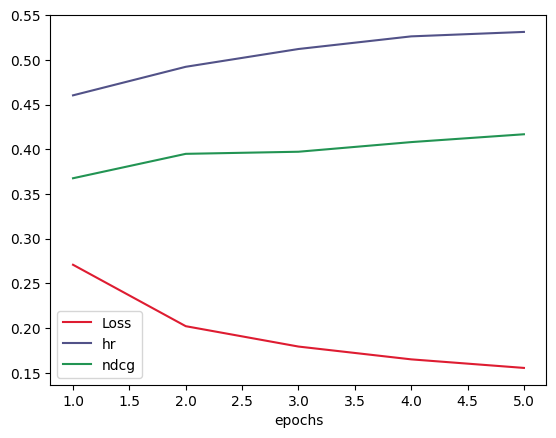

In [43]:
import matplotlib.pyplot as plt
x=np.arange(1,6)
z1 = np.polyfit(x, LOSS, 4)
z2 = np.polyfit(x, HR, 4)
z3 = np.polyfit(x, ND, 4)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
p3 = np.poly1d(z3)
plt.plot(x, p1(x), 'r',label='Loss',color="#de1c31")
plt.plot(x, p2(x), 'r',label='hr',color="#525288")
plt.plot(x, p3(x), 'r',label='ndcg',color="#229453")
plt.xlabel('epochs')
plt.legend()